# PREDICTION

### Given the artists and tracks files of the Spotify dataset, the aim is to predict a track's popularity based on the other features related to it, including the individual popularities of the artists as taken from the artists file; and comparing and choosing the most accurate machine learning model.

## Dataset exploration

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path="/content/drive/MyDrive/Prajaswi_Hunagund_2024UCA1881/Dataset/artists.csv"
df=pd.read_csv(path)
df.head(5)

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [5]:
path_tracks="/content/drive/MyDrive/Prajaswi_Hunagund_2024UCA1881/Dataset/tracks.csv"
df_tracks=pd.read_csv(path_tracks)
df_tracks.head(5)


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [6]:
df_tracks.shape

(586672, 20)

In [7]:
df_tracks.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [8]:
df_tracks.isnull().sum()


,0
id,0
name,71
popularity,0
duration_ms,0
explicit,0
artists,0
id_artists,0
release_date,0
danceability,0
energy,0


## Plotting graphs

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28961 (\N{CJK UNIFIED IDEOGRAPH-7121}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24425 (\N{CJK UNIFIED IDEOGRAPH-5F69}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31558 (\N{CJK UNIFIED IDEOGRAPH-7B46}) missing from font(s) DejaVu Sans.
  fig.canvas

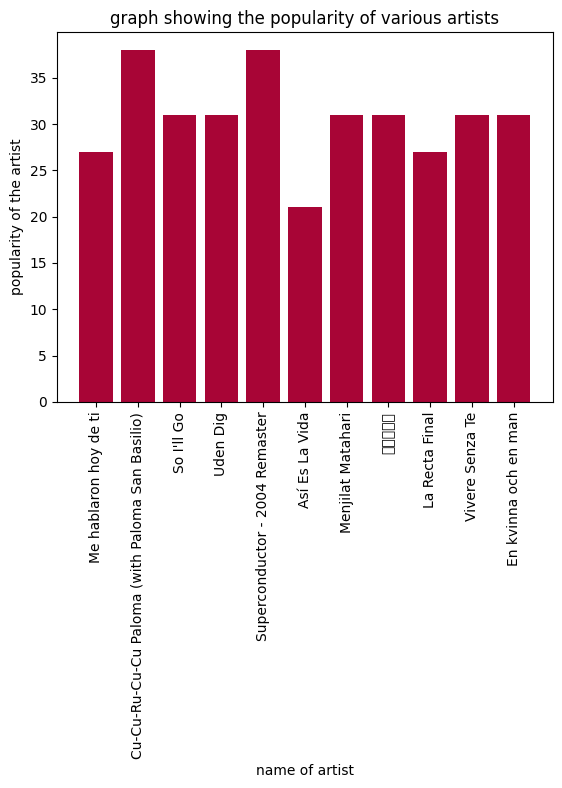

In [9]:
plt.bar(df_tracks['name'][149600:149611], df_tracks['popularity'][149600:149611], color='#a80536')
plt.xlabel('name of artist')
plt.xticks(rotation=90)
plt.ylabel('popularity of the artist')
plt.title("graph showing the popularity of various artists")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12354 (\N{HIRAGANA LETTER A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37912 (\N{CJK UNIFIED IDEOGRAPH-9418}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12434 (\N{HIRAGANA LETTER WO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40180 (\N{CJK UNIFIED IDEOGRAPH-9CF4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, *

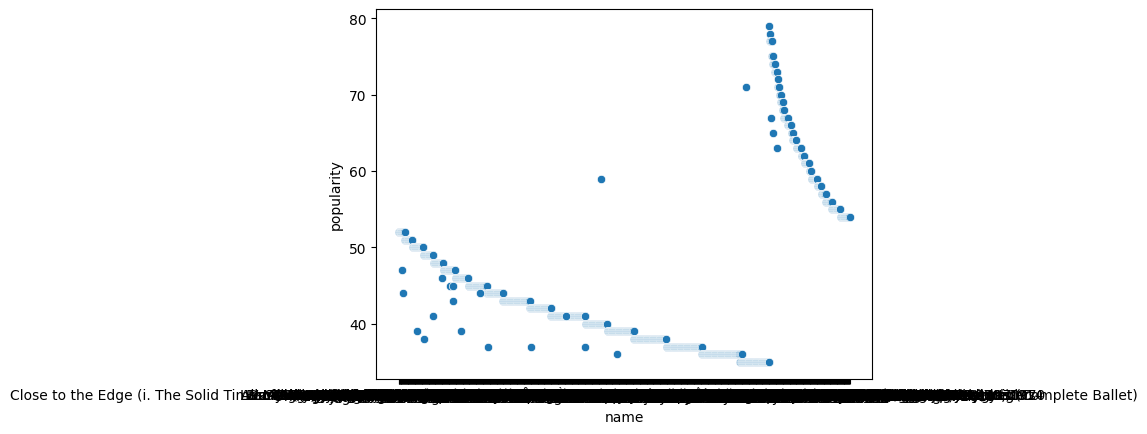

In [10]:
sns.scatterplot(x='name', y='popularity', data=df_tracks[45676:46666])

plt.show()

## Handling missing values

In [11]:
df_tracks.fillna({"name":"Not Known"}, inplace=True)

In [12]:
df_tracks.fillna({"followers":0}, inplace=True)

## StandardScaler

In [13]:
num_df_tracks= df_tracks.select_dtypes(include=['number'])

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df_tracks)
df_scaled = pd.DataFrame(scaled_data, columns=num_df_tracks.columns)
df_scaled


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,-1.174160,-0.815233,-0.214754,0.490096,-0.385182,-1.483654,-0.615393,0.719665,1.924128,0.642528,2.362779,-0.341434,-1.650527,-0.457392,-1.845842
1,-1.500768,-1.042088,-0.214754,0.791115,-1.107625,-1.483654,-2.344110,0.719665,4.736917,0.995129,-0.425120,-0.357710,0.398600,-0.552876,-6.072724
2,-1.500768,-0.382618,-0.214754,-0.780204,-1.449000,-1.199517,-2.156266,0.719665,-0.298309,1.559864,-0.343432,-0.010498,-0.369823,0.401596,2.381040
3,-1.500768,-0.420026,-0.214754,-1.460507,-1.776084,0.505310,-3.488663,0.719665,-0.302756,1.562730,3.014787,-0.596418,-0.602678,1.730782,-1.845842
4,-1.500768,-0.529308,-0.214754,-0.972856,-1.524420,-0.631241,-1.315289,-1.389536,-0.366127,1.545530,0.062013,0.526596,-1.382743,-0.512190,0.267599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,1.220968,0.223004,-0.214754,-0.021636,-0.095410,-1.483654,0.537413,-1.389536,-0.420604,0.960729,-0.425120,-0.809085,-1.324530,0.451253,0.267599
586668,2.418532,-0.606659,-0.214754,1.212541,0.480163,-1.483654,0.979122,0.719665,-0.220485,-0.885409,-0.424007,-0.659350,0.518909,1.062561,0.267599
586669,2.309662,-0.335506,-0.214754,-0.172146,-0.905182,0.505310,-0.514201,-1.389536,-0.356121,1.276063,-0.424558,-0.686476,-1.886099,0.894707,0.267599
586670,1.656446,-0.695890,-0.214754,0.797135,0.289629,1.357723,0.784793,0.719665,-0.391142,-0.699075,-0.425111,0.494045,-0.443560,-0.955375,0.267599


## Adding new column 'artist_popularity' in the tracks file, containing the average of popularity of the artists taken individually according to artists file.

In [15]:
artist_popularity = df.set_index('name')['popularity'].to_dict()

def calculate_popularity(artist_names):
    artist_list = artist_names.split(', ')
    return sum(artist_popularity.get(artist.strip(), 0) for artist in artist_list)

df_tracks['Total_popularity'] = df_tracks['artists'].apply(calculate_popularity)

df_tracks.to_csv("tracks_new.csv", index=False)


In [16]:
has_nonzero = (df_tracks['Total_popularity'] != 0).any()
has_nonzero

True

## Normalization

In [17]:
Artists=num_df_tracks.columns
for i in Artists:
  min=num_df_tracks[i].min()
  max=num_df_tracks[i].max()
  num_df_tracks[str(i)+'_Normalized']=num_df_tracks[i].apply(lambda x: (x-min)/(max-min))
num_df_tracks

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,key_Normalized,loudness_Normalized,mode_Normalized,speechiness_Normalized,acousticness_Normalized,instrumentalness_Normalized,liveness_Normalized,valence_Normalized,tempo_Normalized,time_signature_Normalized
0,6,126903,0,0.645,0.4450,0,-13.338,1,0.4510,0.674,...,0.000000,0.713748,1.0,0.464470,0.676707,0.744000,0.1510,0.1270,0.425564,0.6
1,0,98200,0,0.695,0.2630,0,-22.136,1,0.9570,0.797,...,0.000000,0.579173,1.0,0.985582,0.800201,0.000000,0.1480,0.6550,0.414029,0.2
2,0,181640,0,0.434,0.1770,1,-21.180,1,0.0512,0.994,...,0.090909,0.593796,1.0,0.052729,0.997992,0.021800,0.2120,0.4570,0.529335,1.0
3,0,176907,0,0.321,0.0946,7,-27.961,1,0.0504,0.995,...,0.636364,0.490073,1.0,0.051905,0.998996,0.918000,0.1040,0.3970,0.689907,0.6
4,0,163080,0,0.402,0.1580,3,-16.900,0,0.0390,0.989,...,0.272727,0.659263,0.0,0.040165,0.992972,0.130000,0.3110,0.1960,0.418945,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,50,258267,0,0.560,0.5180,0,-7.471,0,0.0292,0.785,...,0.000000,0.803491,0.0,0.030072,0.788153,0.000000,0.0648,0.2110,0.535333,0.8
586668,72,153293,0,0.765,0.6630,0,-5.223,1,0.0652,0.141,...,0.000000,0.837876,1.0,0.067147,0.141566,0.000297,0.0924,0.6860,0.609183,0.8
586669,70,187601,0,0.535,0.3140,7,-12.823,0,0.0408,0.895,...,0.636364,0.721626,0.0,0.042019,0.898594,0.000150,0.0874,0.0663,0.588905,0.8
586670,58,142003,0,0.696,0.6150,10,-6.212,1,0.0345,0.206,...,0.909091,0.822748,1.0,0.035530,0.206827,0.000003,0.3050,0.4380,0.365406,0.8


## Label encoding

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
L=['id','name','artists','id_artists','release_date']
for i in L:
  df_tracks[i+'_encoded']=le.fit_transform(df_tracks[i])
  df_tracks.drop(i,axis=1,inplace=True)
df_tracks

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,time_signature,Total_popularity,id_encoded,name_encoded,artists_encoded,id_artists_encoded,release_date_encoded
0,6,126903,0,0.645,0.4450,0,-13.338,1,0.4510,0.674,...,0.1510,0.1270,104.851,3,0,240532,62328,103291,61282,3
1,0,98200,0,0.695,0.2630,0,-22.136,1,0.9570,0.797,...,0.1480,0.6550,102.009,1,0,2702,60987,32587,16189,7
2,0,181640,0,0.434,0.1770,1,-21.180,1,0.0512,0.994,...,0.2120,0.4570,130.418,5,0,9304,377629,44117,79643,4
3,0,176907,0,0.321,0.0946,7,-27.961,1,0.0504,0.995,...,0.1040,0.3970,169.980,3,0,10708,106033,44117,79643,4
4,0,163080,0,0.402,0.1580,3,-16.900,0,0.0390,0.989,...,0.3110,0.1960,103.220,4,0,11684,198883,25190,48500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,50,258267,0,0.560,0.5180,0,-7.471,0,0.0292,0.785,...,0.0648,0.2110,131.896,4,0,446276,429411,113813,21936,19497
586668,72,153293,0,0.765,0.6630,0,-5.223,1,0.0652,0.141,...,0.0924,0.6860,150.091,4,0,30852,399847,81827,25584,19522
586669,70,187601,0,0.535,0.3140,7,-12.823,0,0.0408,0.895,...,0.0874,0.0663,145.095,4,0,166260,384869,31569,47474,19473
586670,58,142003,0,0.696,0.6150,10,-6.212,1,0.0345,0.206,...,0.3050,0.4380,90.029,4,0,314741,13688,36289,71060,19657


## Comparing ML models

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [23]:
A=df_without_popularity = df_tracks.drop(columns=['popularity'], errors='ignore')
B=df_tracks['popularity']
A_train, A_test, B_train, B_test = train_test_split(A,B, test_size=0.2, random_state=42)
print(A_train)
print(A_test)
print(B_train)
print(B_test)

        duration_ms  explicit  danceability  energy  key  loudness  mode  \
431626       206933         0         0.700   0.385    0   -13.987     1   
481382       163600         0         0.637   0.839    2    -4.454     0   
41728        149280         0         0.634   0.586    4    -9.597     1   
419851       231288         0         0.820   0.814   10    -5.338     1   
172826       294000         0         0.295   0.961    2    -4.605     1   
...             ...       ...           ...     ...  ...       ...   ...   
110268       246178         0         0.745   0.451   11    -6.314     0   
259178       157013         0         0.448   0.727    7    -7.692     1   
365838       188200         0         0.789   0.198    9   -14.683     1   
131932       307000         1         0.629   0.578    1    -4.704     1   
121958       195933         0         0.508   0.033    7   -28.002     1   

        speechiness  acousticness  instrumentalness  liveness  valence  \
431626       

In [24]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "KNN Regressor": KNeighborsRegressor()
}


In [25]:
results = {}

for model_name, model in models.items():
    model.fit(A_train, B_train)
    B_pred = model.predict(A_test)

    mse = mean_squared_error(B_test, B_pred)
    rmse = mse ** 0.5
    r2 = r2_score(B_test, B_pred)
    mae = mean_absolute_error(B_test, B_pred)

    results[model_name] = {"MSE": mse, "RMSE": rmse, "R²": r2, "MAE": mae}


In [26]:
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print("-" * 30)


Linear Regression:
  MSE: 215.2557
  RMSE: 14.6716
  R²: 0.3567
  MAE: 11.4073
------------------------------
Decision Tree:
  MSE: 286.3151
  RMSE: 16.9208
  R²: 0.1444
  MAE: 11.9941
------------------------------
Random Forest:
  MSE: 136.8971
  RMSE: 11.7003
  R²: 0.5909
  MAE: 8.5942
------------------------------
KNN Regressor:
  MSE: 290.3083
  RMSE: 17.0384
  R²: 0.1324
  MAE: 13.5187
------------------------------


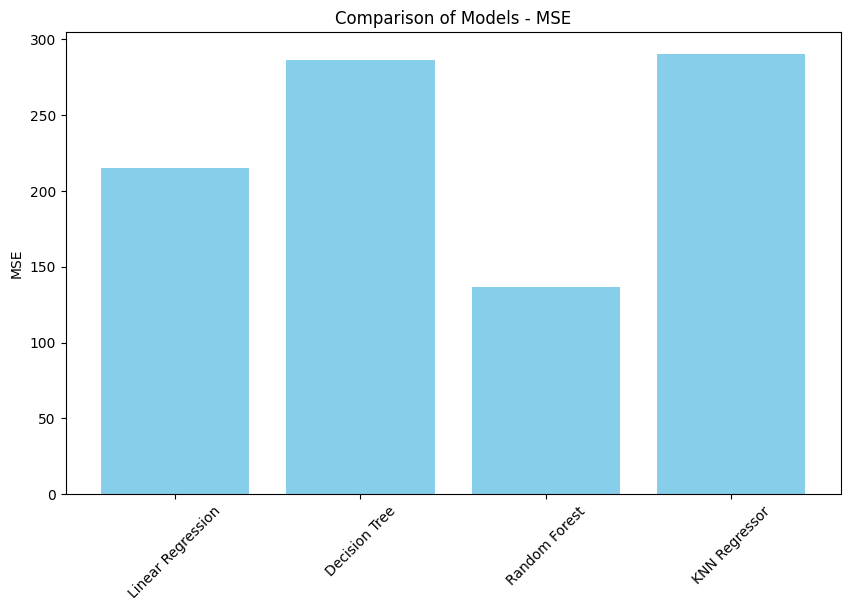

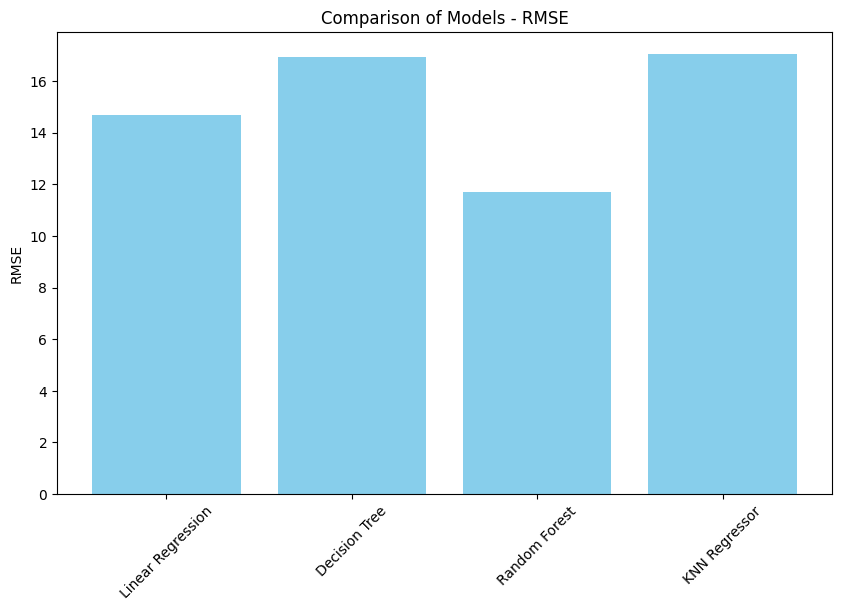

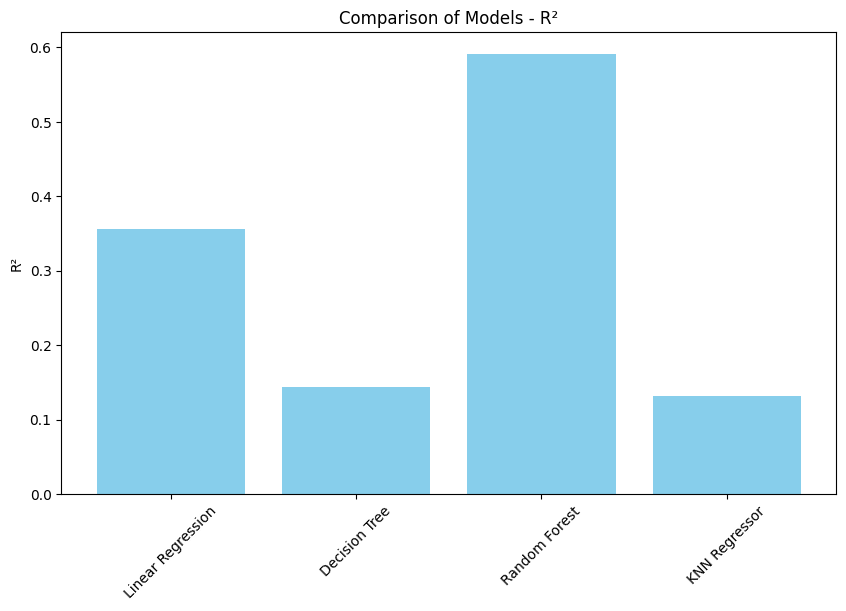

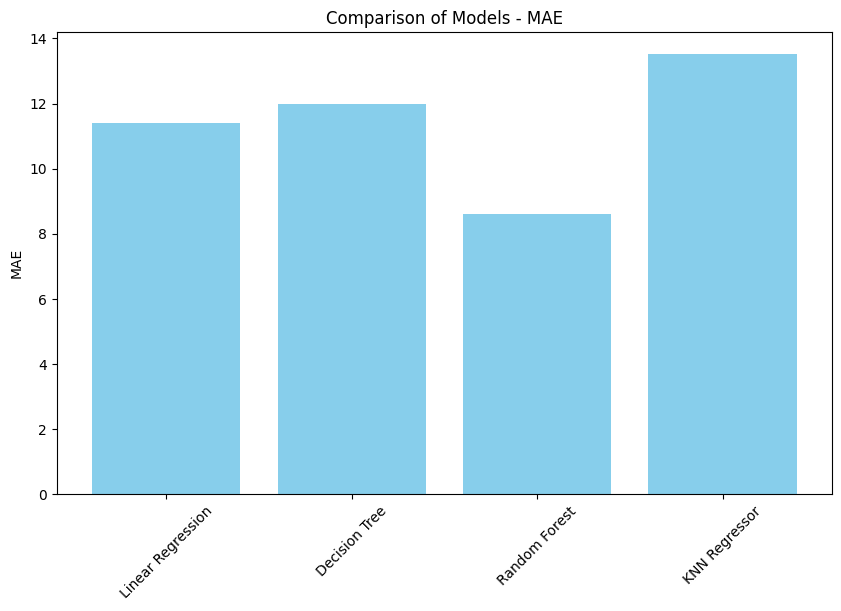

In [27]:
metrics_to_plot = ['MSE', 'RMSE', 'R²', 'MAE']

for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    model_names = list(results.keys())
    metric_values = [results[model][metric] for model in model_names]

    plt.bar(model_names, metric_values, color='skyblue')
    plt.title(f'Comparison of Models - {metric}')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.show()
